<a href="https://colab.research.google.com/github/Sankeetha-Elancheliyan/CM2604-ML-CW/blob/main/ML_CW_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Preparation**


In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

headers = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_%3B','char_freq_%28','char_freq_%5B','char_freq_%21','char_freq_%24','char_freq_%23','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']

dataset=pd.read_csv(url, header=None, names=headers)

In [87]:
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [88]:
# Check for null values
print(dataset.isnull().sum())

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [89]:
# Remove null values
dataset.dropna(inplace=True)

In [90]:
# Check for duplicates
print(dataset.duplicated().sum())

391


In [91]:
# Remove duplicates
dataset.drop_duplicates(inplace=True)

In [92]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 

In [93]:
# Split features and target
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

**Perform PCA**

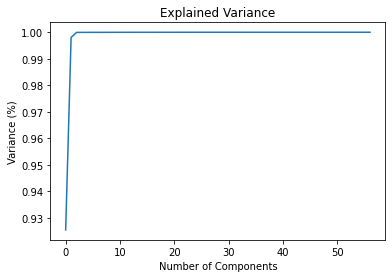

In [94]:

pca = PCA()
principalComponents = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) 
principle_components = pca.fit_transform(X)


In [96]:
pca.explained_variance_ratio_

array([9.25462065e-01, 7.25629100e-02, 1.91461432e-03, 1.02875405e-05,
       7.15869294e-06])

In [97]:
# create a DataFrame from the transformed data
pca_df = pd.DataFrame(data=principle_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# print the DataFrame
print(pca_df)

              PC1         PC2        PC3       PC4       PC5
0      -11.600978   10.680921  -2.502124 -0.809472 -0.109702
1      735.050164  -70.631211  -1.008541 -1.839826  0.284617
2     2011.760589  108.977003 -25.300167  0.078987  0.114321
3     -100.843543    4.030041  -1.237882 -1.394402  0.063179
4     -100.843544    4.030039  -1.237879 -1.394299  0.063172
...           ...         ...        ...       ...       ...
4205  -208.470738  -15.967542  -0.745520  0.291853 -0.432080
4206  -281.339988   -3.032358  -0.816279 -3.541935  0.512332
4207  -178.377573  -17.824756  -0.611699 -0.338601 -0.303937
4208  -218.018609  -12.391679  -0.977085 -0.554278 -0.161194
4209  -255.521900   -6.264065  -1.075588 -2.334811  0.358928

[4210 rows x 5 columns]


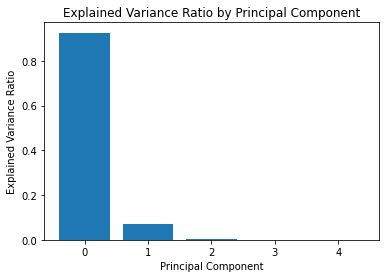

In [98]:
import matplotlib.pyplot as plt

# assuming pca is your trained PCA object
explained_variance_ratio = pca.explained_variance_ratio_

# create a bar chart of the explained variance ratio
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


**Split Dataset**

In [99]:
from sklearn.model_selection import train_test_split

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Normalize Features**

In [100]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Find Optimal Value for k**

In [101]:
from sklearn.neighbors import KNeighborsClassifier
#finding optimal value of k
k=0
M=-1
for i in range (1,10):
    ModelK=KNeighborsClassifier(n_neighbors=i)
    ModelK.fit(X_train,y_train)
    S=ModelK.score(X_test,y_test)
    if S>M:
        M=S
        k=i
print(k)



9


**KNN Model**

In [102]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

**Prediction**

In [103]:
knn_pred = knn.predict(X_test)

In [104]:
input_data =[0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1.93,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.778,0,0,3.756,61,278]
reshaped_input = np.array(input_data).reshape(1, -1)
classify=knn.predict(reshaped_input)
if classify == 0:
  print("NO-SPAM")
elif classify== 1:
  print("SPAM")

SPAM


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       483
           1       0.90      0.84      0.87       359

    accuracy                           0.89       842
   macro avg       0.89      0.89      0.89       842
weighted avg       0.89      0.89      0.89       842



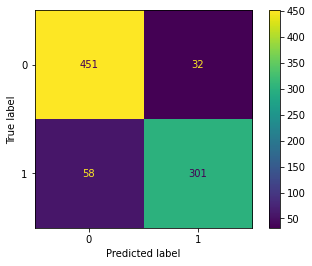

In [106]:
# Create the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, knn_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

**Evaluation**

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Evaluation Metrics for KNN
print('KNN Results:')
print('Accuracy:', accuracy_score(y_test, knn_pred))
print('Precision:', precision_score(y_test, knn_pred))
print('Recall:', recall_score(y_test, knn_pred))
print('F1 Score:', f1_score(y_test, knn_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, knn_pred))

KNN Results:
Accuracy: 0.8931116389548693
Precision: 0.9039039039039038
Recall: 0.8384401114206128
F1 Score: 0.869942196531792
Confusion Matrix:
 [[451  32]
 [ 58 301]]


**Transform the Normalized Features to PCA**

In [108]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
# X.pca.shape

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


**Finding Optimal Value for k**

In [109]:
from sklearn.neighbors import KNeighborsClassifier
#finding optimal value of k
k=0
M=-1
for i in range (1,10):
    ModelK=KNeighborsClassifier(n_neighbors=i)
    ModelK.fit(X_train_pca,y_train)
    S=ModelK.score(X_test_pca,y_test)
    if S>M:
        M=S
        k=i
print(k)



3


**KNN Model**

In [110]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

**Prediction**

In [111]:
knn_pred = knn.predict(X_test_pca)

In [118]:
input_data=[-11.600978  , 10.680921 , -2.502124, -0.809472 ,-0.109700]
reshaped_input = np.array(input_data).reshape(1, -1)
classify=knn.predict(reshaped_input)
if classify == 0:
  print("NO-SPAM")
elif classify== 1:
  print("SPAM")

SPAM


**Evaluation**

In [113]:

# Evaluation Metrics for KNN
print('KNN Results (with PCA):')
print('Accuracy:', accuracy_score(y_test, knn_pred))
print('Precision:', precision_score(y_test, knn_pred))
print('Recall:', recall_score(y_test, knn_pred))
print('F1 Score:', f1_score(y_test, knn_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, knn_pred))


KNN Results (with PCA):
Accuracy: 0.8551068883610451
Precision: 0.8414985590778098
Recall: 0.8133704735376045
F1 Score: 0.8271954674220963
Confusion Matrix:
 [[428  55]
 [ 67 292]]


In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameters to explore
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Create the KNN model
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_pca, y_train)

# Print the best hyperparameters and corresponding accuracy score
print('Best hyperparameters:', grid_search.best_params_)
print('Accuracy score:', grid_search.best_score_)


Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy score: 0.8752950824731813


In [115]:

k = 0
M = -1
for i in range(1, 10):
    model_k = KNeighborsClassifier(n_neighbors=i, weights='distance', p=3) #manhattan
    model_k.fit(X_train_pca, y_train)
    s = model_k.score(X_test_pca, y_test)
    if s > M:
        M = s
        k = i
print('Optimal value of k:', k)


Optimal value of k: 9


In [116]:
k = 0
M = -1
for i in range(1, 10):
    model_k = KNeighborsClassifier(n_neighbors=i, weights='uniform', p=2) #euclidian
    model_k.fit(X_train_pca, y_train)
    s = model_k.score(X_test_pca, y_test)
    if s > M:
        M = s
        k = i
print('Optimal value of k:', k)

Optimal value of k: 3


In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA
pca = PCA(n_components=5) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# KNN Model with Euclidean distance and uniform weights
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='euclidean')
knn.fit(X_train_pca, y_train)
knn_pred = knn.predict(X_test_pca)

# Evaluation Metrics for KNN with Euclidean distance and uniform weights
print('KNN Results (with PCA, Euclidean Distance, Uniform Weights):')
print('Accuracy:', accuracy_score(y_test, knn_pred))
print('Precision:', precision_score(y_test, knn_pred))
print('Recall:', recall_score(y_test, knn_pred))
print('F1 Score:', f1_score(y_test, knn_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, knn_pred))

# KNN Model with Manhattan distance and uniform weights
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='manhattan')
knn.fit(X_train_pca, y_train)
knn_pred = knn.predict(X_test_pca)

# Evaluation Metrics for KNN with Manhattan distance and uniform weights
print('\nKNN Results (with PCA, Manhattan Distance, Uniform Weights):')
print('Accuracy:', accuracy_score(y_test, knn_pred))
print('Precision:', precision_score(y_test, knn_pred))
print('Recall:', recall_score(y_test, knn_pred))
print('F1 Score:', f1_score(y_test, knn_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, knn_pred))

# KNN Model with Chebyshev distance and uniform weights
knn_chebyshev = KNeighborsClassifier(n_neighbors=9, metric='chebyshev', weights='uniform')
knn_chebyshev.fit(X_train_pca, y_train)
knn_chebyshev_pred = knn_chebyshev.predict(X_test_pca)

# Evaluation Metrics for KNN with Chebyshev distance and uniform weights
print('KNN Results (with Chebyshev distance and uniform weights):')
print('Accuracy:', accuracy_score(y_test, knn_chebyshev_pred))
print('Precision:', precision_score(y_test, knn_chebyshev_pred))
print('Recall:', recall_score(y_test, knn_chebyshev_pred))
print('F1 Score:', f1_score(y_test, knn_chebyshev_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, knn_chebyshev_pred))


# KNN Model with Euclidean distance and distance weights
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='euclidean')
knn.fit(X_train_pca, y_train)
knn_pred = knn.predict(X_test_pca)

# Evaluation Metrics for KNN with Euclidean distance and distance weights
print('\nKNN Results (with PCA, Euclidean Distance, Distance Weights):')
print('Accuracy:', accuracy_score(y_test, knn_pred))
print('Precision:', precision_score(y_test, knn_pred))
print('Recall:', recall_score(y_test, knn_pred))
print('F1 Score:', f1_score(y_test, knn_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, knn_pred))

# KNN Model with Manhattan distance and distance weights
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='manhattan')
knn.fit(X_train_pca, y_train)
knn_pred = knn.predict(X_test_pca)

# Evaluation Metrics for KNN with Manhattan distance and distance weights
print('\nKNN Results (with PCA, Manhattan Distance, Distance Weights):')
print('Accuracy:', accuracy_score(y_test, knn_pred))
print('Precision:', precision_score(y_test, knn_pred))
print('Recall:', recall_score(y_test, knn_pred))
print('F1 Score:', f1_score(y_test, knn_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, knn_pred))

# KNN model with chebyshev distance and distance weights
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='chebyshev')
knn.fit(X_train_pca, y_train)
knn_pred = knn.predict(X_test_pca)

# Evaluation metrics for KNN with chebyshev distance and distance weights
print('KNN Results (with Chebyshev distance and distance weights):')
print('Accuracy:', accuracy_score(y_test, knn_pred))
print('Precision:', precision_score(y_test, knn_pred))
print('Recall:', recall_score(y_test, knn_pred))
print('F1 Score:', f1_score(y_test, knn_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, knn_pred))




KNN Results (with PCA, Euclidean Distance, Uniform Weights):
Accuracy: 0.9061757719714965
Precision: 0.8888888888888888
Recall: 0.8913649025069638
F1 Score: 0.890125173852573
Confusion Matrix:
 [[443  40]
 [ 39 320]]

KNN Results (with PCA, Manhattan Distance, Uniform Weights):
Accuracy: 0.9049881235154394
Precision: 0.8821917808219178
Recall: 0.8969359331476323
F1 Score: 0.8895027624309393
Confusion Matrix:
 [[440  43]
 [ 37 322]]
KNN Results (with Chebyshev distance and uniform weights):
Accuracy: 0.9073634204275535
Precision: 0.8935574229691877
Recall: 0.8885793871866295
F1 Score: 0.8910614525139665
Confusion Matrix:
 [[445  38]
 [ 40 319]]

KNN Results (with PCA, Euclidean Distance, Distance Weights):
Accuracy: 0.9085510688836105
Precision: 0.8895027624309392
Recall: 0.8969359331476323
F1 Score: 0.8932038834951456
Confusion Matrix:
 [[443  40]
 [ 37 322]]

KNN Results (with PCA, Manhattan Distance, Distance Weights):
Accuracy: 0.9133016627078385
Precision: 0.8907103825136612
Recall